                                            Glass Identification
Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.Id number: 1 to 214
2.RI: refractive index
3.Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.Mg: Magnesium
5.Al: Aluminum
6.Si: Silicon
7.K: Potassium
8.Ca: Calcium
9.Ba: Barium
10.Fe: Iron
11.Type of glass: (class attribute)
    
    
•   1- building_windows_float_processed
•   2- building_windows_non_float_processed
•   3- vehicle_windows_float_processed
•   4- vehicle_windows_non_float_processed (none in this database)
•   5- containers
•   6- tableware
•   7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass



In [7]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [8]:
##Loading the data
data=pd.read_csv(r'C:\Users\HP\Downloads\glass.csv')
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In the given dataset first row is considered as column name so we have change it to the row and fix the column which was already provided in the given data.

In [11]:
#forming a new row:
new_row=[1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1]

In [12]:
#converting to dataframe:
new_df=pd.DataFrame([new_row], columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
new_df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1


In [13]:
#shape of the new row
new_df.shape

(1, 11)

In [14]:
#providing the column name for the given dataset:
data.set_axis(['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'],axis='columns', inplace=True)
data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [15]:
data.shape

(213, 11)

In [16]:
new_row=[1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1]

In [17]:
new_df=pd.DataFrame([new_row], columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
new_df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1


In [18]:
data.shape


(213, 11)

In [19]:
data=pd.concat([new_df, data], ignore_index=True)
data

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


now the shape of the datase is 214 rows and 11 columns.

Preprocessing 

In [20]:
#droping id number column:
data.drop('Id number', axis=1, inplace=True)
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


neglecting the id number because it has no impact on the dataset.

In [21]:
#find shape of dataset
data.shape

(214, 10)

In [22]:
#name of the columns
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [23]:
#finding the null values in the given dataset
data.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

No null values are presented.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


there and no null values presented and the data contains only numerical values.

In [25]:
data.nunique().to_frame('unique values')

,unique values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of glass,6


In [26]:
data['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [27]:
data['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

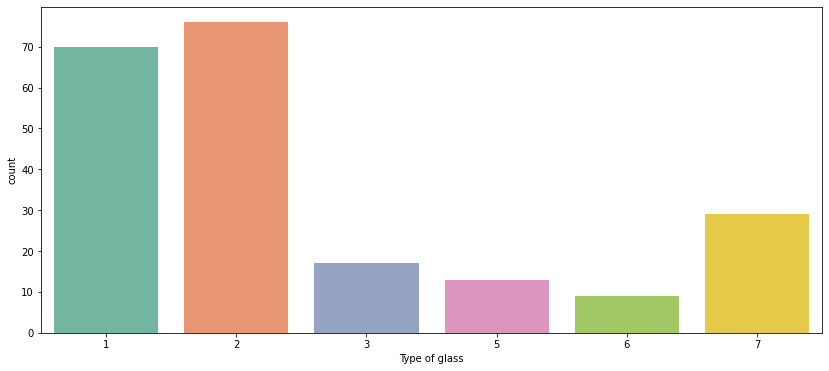

In [28]:
plt.figure(figsize=(14,6))
sns.countplot(data['Type of glass'], palette = 'Set2')

As we can see type 1 and 2 is high compare with other

In [30]:
#describing the dataset
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


By the describe method the following assumptions are made:

1. The count value in each column is same that means there is no null values in the data.

2. The mean is greater than 50% of median in all columns which means there is skewness in the data.

3. There is huge difference between 75% and max values in k , Ba,Fe columns.
4. we can also get standard deviation, min,25% values  in these method.

Visualization

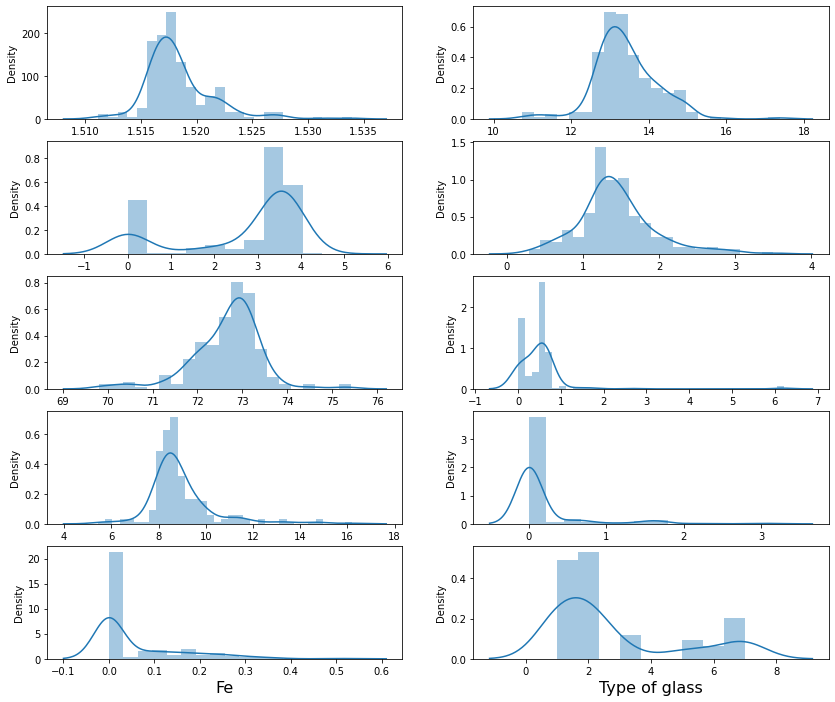

In [31]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in data:
    if plotnumber<=10:
    
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

It is clearly showing that there is skewness in all columns.

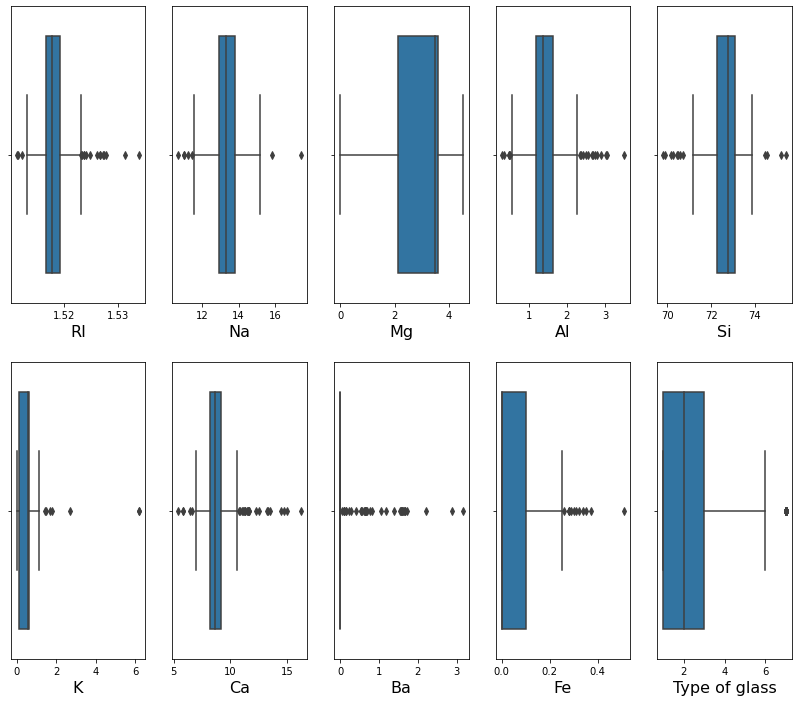

In [32]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in data:
    if plotnumber<=10:
    
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(data[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

Except mg column remaining all have outliers, now we are reducing those using zscore method.

In [33]:
from scipy import stats
from scipy.stats import zscore
glass=data.drop('Type of glass', axis=1)
z=np.abs(zscore(data))

threshold=3
np.where(z>3)
glass=data[(z<3).all(axis=1)]

In [34]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [35]:
data_loss=(213-193)/213*100
data_loss

9.389671361502346

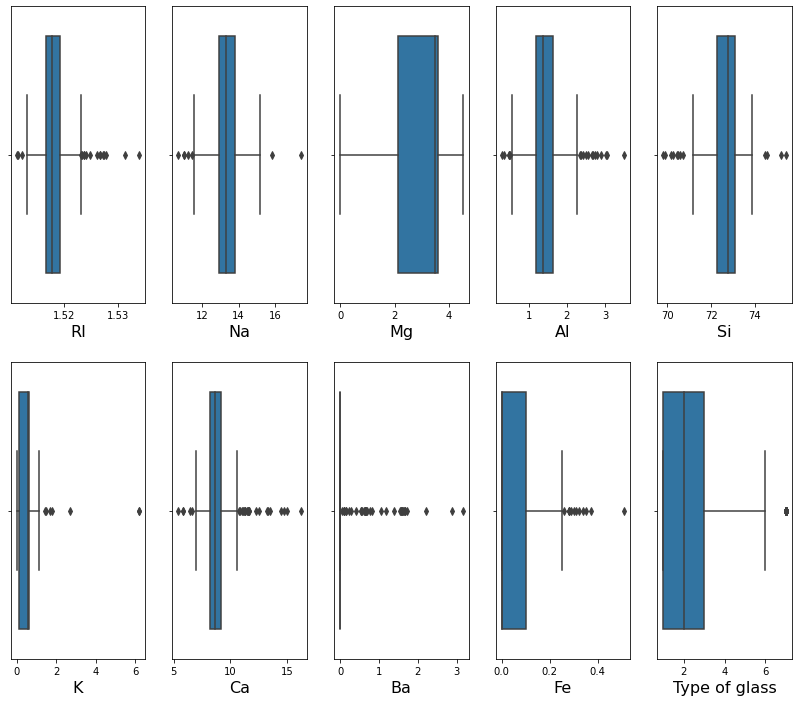

In [36]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in data:
    if plotnumber<=10:
    
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(data[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

In [37]:
#finding skewness:
glass.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type of glass    1.284007
dtype: float64

As we can see here Ba column has more skewness so i am reducing it by using transform method

In [38]:
glass['Ba']=np.sqrt(glass['Ba'])

In [39]:
glass.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               2.465013
Fe               1.486479
Type of glass    1.284007
dtype: float64

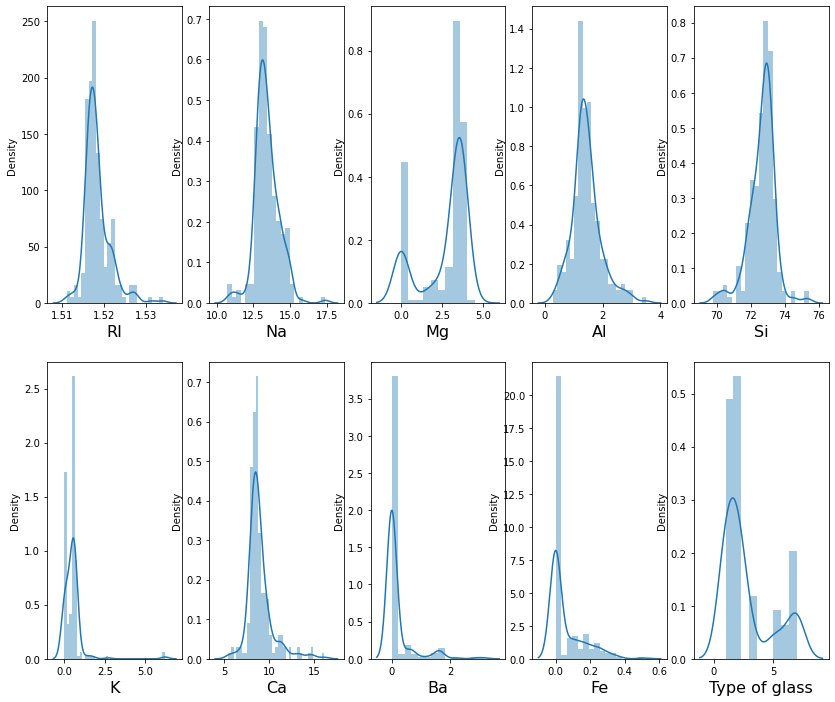

In [40]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in data:
    if plotnumber<=10:
    
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

In [41]:
#corelation b/n features and target variable.
corr=glass.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.221472,-0.020046,-0.167355
Na,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.554594,-0.209838,0.533025
Mg,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.624654,0.134065,-0.810321
Al,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.592898,-0.117764,0.660262
Si,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.178210,0.023279,0.262152
K,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.290099,0.099394,-0.383499
Ca,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.149581,-0.011635,0.154762
Ba,-0.221472,0.554594,-0.624654,0.592898,0.178210,-0.290099,-0.149581,1.000000,-0.092385,0.710327
Fe,-0.020046,-0.209838,0.134065,-0.117764,0.023279,0.099394,-0.011635,-0.092385,1.000000,-0.202028
Type of glass,-0.167355,0.533025,-0.810321,0.660262,0.262152,-0.383499,0.154762,0.710327,-0.202028,1.000000


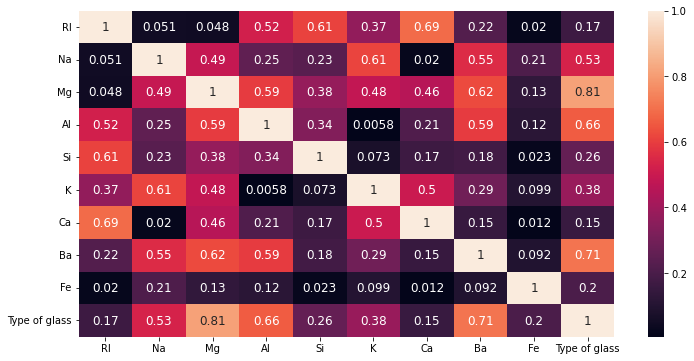

In [42]:
df_corr=glass.corr().abs()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

Ba has highest correlation with Na, Mg, Al columns , now i am droping the Ba.

In [43]:
glass.drop("Ba",axis=1, inplace=True)


In [44]:
glass


,RI,Na,Mg,Al,Si,K,Ca,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,7


In [45]:
corr['Type of glass'].sort_values(ascending=False)

Type of glass    1.000000
Ba               0.710327
Al               0.660262
Na               0.533025
Si               0.262152
Ca               0.154762
RI              -0.167355
Fe              -0.202028
K               -0.383499
Mg              -0.810321
Name: Type of glass, dtype: float64

In [46]:
#fixing features and label

a=glass.drop('Type of glass', axis=1)
b=glass['Type of glass']

In [47]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.603056
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.603056
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.603056
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.603056
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.603056
...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,-0.603056
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,-0.603056
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,-0.603056
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,-0.603056


In [48]:
x_scaled

array([[ 1.29178128,  0.33212692,  1.23339705, ..., -1.31960855,
        -0.07565285, -0.60305615],
       [-0.19783224,  0.70439768,  0.55158129, ...,  0.17209101,
        -1.00814732, -0.60305615],
       [-0.82434616,  0.16832779,  0.51327703, ..., -0.14755889,
        -1.05882637, -0.60305615],
       ...,
       [-0.53080467,  2.23815319, -2.20632516, ..., -1.53270848,
        -0.43040618, -0.60305615],
       [ 1.13405749,  1.4042667 , -2.20632516, ..., -1.53270848,
        -0.38986294, -0.60305615],
       [-0.67976602,  1.43404836, -2.20632516, ..., -1.53270848,
        -0.3493197 , -0.60305615]])

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,5.096412,RI
1,12.721020,Na
2,25.852880,Mg
3,7.059272,Al
4,9.529611,Si
5,4.357206,K
6,14.776555,Ca
7,1.077843,Fe


the vif values are very high which means that there is multicollinearity inorder to reduce it i am droping Mg column which has highest value.

In [50]:
a=a.drop('Mg', axis=1)

In [51]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,4.869326,RI
1,2.729326,Na
2,1.688865,Al
3,2.467209,Si
4,3.011218,K
5,2.935600,Ca
6,1.061729,Fe


Now there is no multicollinearity problem.

In [52]:
b.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type of glass, dtype: int64

the data is imbalnced so, we have to balance it.

In [53]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b=sampling.fit_resample(a,b)

In [54]:
b.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type of glass, dtype: int64

In [55]:
b=b.apply(lambda y_value:1  if y_value>=3 else 0 )
b

0      0
1      0
2      0
3      0
4      0
      ..
415    1
416    1
417    1
418    1
419    1
Name: Type of glass, Length: 420, dtype: int64

In [56]:
a

,RI,Na,Al,Si,K,Ca,Fe
0,1.291781,0.332127,-0.729105,-1.612464,-1.319609,-0.075653,-0.603056
1,-0.197832,0.704398,-0.141722,0.016082,0.172091,-1.008147,-0.603056
2,-0.824346,0.168328,0.264928,0.461790,-0.147559,-1.058826,-0.603056
3,-0.175926,-0.308179,-0.299864,-0.189629,0.491741,-0.612851,-0.603056
4,-0.281075,-0.218834,-0.412822,0.616073,0.420708,-0.764888,-0.603056
...,...,...,...,...,...,...,...
415,-1.091049,1.430479,2.838514,0.547637,-1.424693,0.348717,-0.603056
416,-0.558385,1.996853,2.107175,0.958925,-1.532708,0.052658,-0.196650
417,-0.782032,1.412530,0.912507,0.658211,-1.532708,-0.156739,-0.603056
418,0.450785,1.105578,0.652941,0.418117,-0.770522,-0.196394,-0.077542


In [57]:
b.unique()

array([0, 1], dtype=int64)

Modelling

In [58]:

scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[ 1.34936131,  0.12840283, -0.99975599, ..., -0.98457615,
        -0.45027352, -0.46637533],
       [-0.27154558,  0.43793739, -0.42431221, ...,  0.44049032,
        -1.2150773 , -0.46637533],
       [-0.95327995, -0.00779238, -0.02592805, ...,  0.13511893,
        -1.25664272, -0.46637533],
       ...,
       [-0.90723623,  1.02673312,  0.60848816, ..., -1.18815707,
        -0.5167782 , -0.46637533],
       [ 0.43423995,  0.77150919,  0.35419784, ..., -0.4600172 ,
        -0.54930191,  0.18322416],
       [-0.9668799 ,  1.76756831,  1.71275633, ..., -1.14886779,
        -0.46042321, -0.46637533]])

In [83]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [86]:
#getting best random state
from sklearn.ensemble import RandomForestClassifier
Accu_max=0
Rs_max=0
for k in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.9841269841269841 at random state is 44


In [87]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=44)

In [88]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
       
        
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [89]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 93.650794%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.98      0.93      0.96        91

    accuracy                           0.94       126
   macro avg       0.91      0.94      0.92       126
weighted avg       0.94      0.94      0.94       126



array([[33,  2],
       [ 6, 85]], dtype=int64)

In [90]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 94.444444%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        35
           1       0.93      1.00      0.96        91

    accuracy                           0.94       126
   macro avg       0.96      0.90      0.93       126
weighted avg       0.95      0.94      0.94       126



array([[28,  7],
       [ 0, 91]], dtype=int64)

In [91]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 98.412698%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.98      1.00      0.99        91

    accuracy                           0.98       126
   macro avg       0.99      0.97      0.98       126
weighted avg       0.98      0.98      0.98       126



array([[33,  2],
       [ 0, 91]], dtype=int64)

In [92]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 96.825397%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.97      0.99      0.98        91

    accuracy                           0.97       126
   macro avg       0.97      0.95      0.96       126
weighted avg       0.97      0.97      0.97       126



array([[32,  3],
       [ 1, 90]], dtype=int64)

In [93]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 96.031746%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.97      0.98      0.97        91

    accuracy                           0.96       126
   macro avg       0.95      0.95      0.95       126
weighted avg       0.96      0.96      0.96       126



array([[32,  3],
       [ 2, 89]], dtype=int64)

In [94]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 98.412698%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.99      0.99      0.99        91

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



array([[34,  1],
       [ 1, 90]], dtype=int64)

In [95]:
score=cross_val_score(dc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.89285714 0.77380952 0.94047619 0.70238095 0.92857143]
0.8476190476190476
Difference between Accuracy score and cross validation score is-  -0.2523809523809524


In [96]:
score=cross_val_score(kn, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.89285714 0.6547619  0.89285714 0.91666667 0.88095238]
0.8476190476190476
Difference between Accuracy score and cross validation score is-  -0.2523809523809524


In [97]:
score=cross_val_score(GB, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.91666667 0.76190476 0.92857143 0.89285714 0.94047619]
0.8880952380952379
Difference between Accuracy score and cross validation score is-  -0.2928571428571427


In [98]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.95238095 0.79761905 0.96428571 0.94047619 0.94047619]
0.9190476190476191
Difference between Accuracy score and cross validation score is-  -0.3238095238095239


In [99]:
score=cross_val_score(bag, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.9047619  0.5952381  0.92857143 0.9047619  0.92857143]
0.8523809523809524
Difference between Accuracy score and cross validation score is-  -0.2571428571428571


In [100]:
score=cross_val_score(rfc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.91666667 0.82142857 0.95238095 0.9047619  0.94047619]
0.9071428571428571
Difference between Accuracy score and cross validation score is-  -0.3119047619047619


As per the above observation i am considering decision tree classifier model where my accuracy score is 93%


Hyperparameter tuning

In [101]:
#giving parameters for the decision tree classifier:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,70)
}

In [102]:
grid_search=GridSearchCV(estimator=dc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [103]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 42),
                         'max_leaf_nodes': range(20, 70),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [104]:
#finding the best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 28, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [143]:
final_model=DecisionTreeClassifier( max_depth= 37, max_leaf_nodes=55, min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=37, max_leaf_nodes=55)

In [144]:
dc.score(x_test,y_test)

0.9365079365079365

In [145]:
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 96.031746%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.98      0.97      0.97        91

    accuracy                           0.96       126
   macro avg       0.95      0.95      0.95       126
weighted avg       0.96      0.96      0.96       126



By using this hyperparameter tuning my model accuracy score is increased to 96%

ROC-AUC CURVE

In [146]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

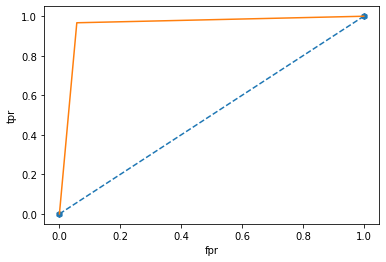

Auc Score is : 
 95.4945054945055


In [147]:
y_pred=final_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'h--')
plt.plot(fpr,tpr, label="decision tree classifier"%roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc Score is :','\n', auc_score*100)

Saving my model

In [148]:
import pickle
filename='Glass prediction'
pickle.dump(dc, open(filename,'wb'))


In [149]:
import pickle
loaded_model=pickle.load(open('Glass prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

93.65079365079364


In [150]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
original,0,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,1,1,1
predicted,0,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,1,1,1


finally, it is done